## Image Analysis with k-Means Clustering
* Grouping pixels into k clusters

In [32]:
R.version.string

[1] "R version 3.2.2 (2015-08-14)"

In [40]:
if ("jpeg" %in% rownames(installed.packages()) == FALSE) {
    install.packages("jpeg"), 
}

**Download an image and read into a variable**

In [1]:
# load the package jpeg
library(jpeg)

# Andreas Velten Lab - confocal images of zebrafish
url <- "http://pages.discovery.wisc.edu/~avelten/images/zebrafish_brain_10x.jpeg"
# url <- "http://pages.discovery.wisc.edu/~avelten/images/zebrafish_stitched.png"

# download the file and save it as "Image.jpg" in the current directory
image.down <- download.file(url, "image.jpg")

# read the image
img <- readJPEG("image.jpg") # Read the image

dim(img)

[1] 1120 1120    3

**Clean up the data**

In [33]:
# Obtain the dimension
imgDm <- dim(img)

# Assign RGB channels to data frame
imgRGB <- data.frame(
  x = rep(1:imgDm[2], each = imgDm[1]),
  y = rep(imgDm[1]:1, imgDm[2]),
  R = as.vector(img[,,1]),
  G = as.vector(img[,,2]),
  B = as.vector(img[,,3])
)

**Plot it**

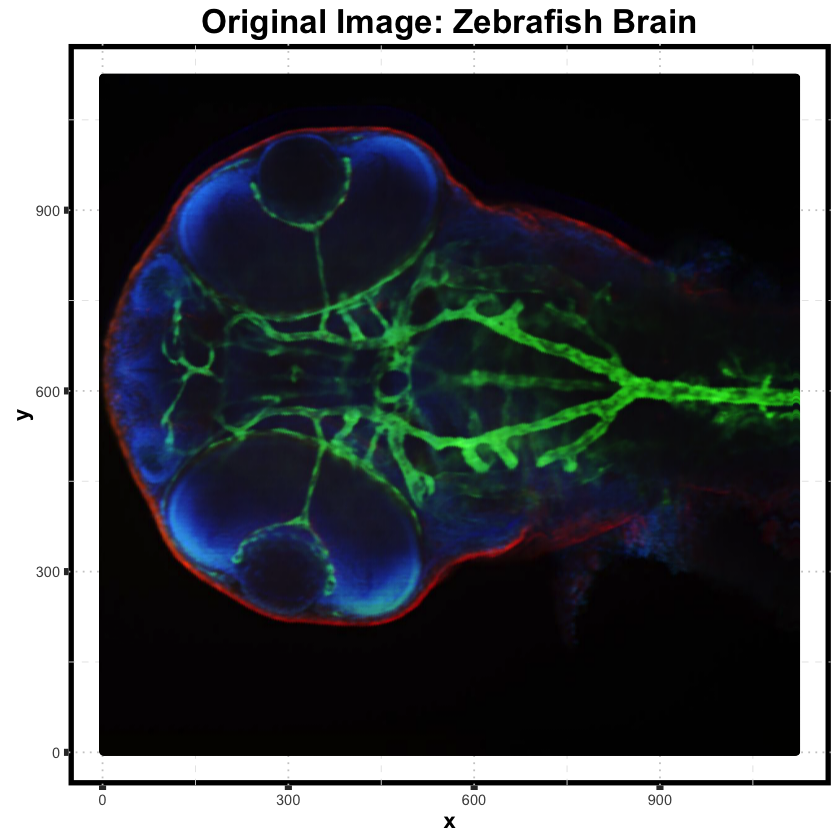

In [39]:
library(ggplot2)

# ggplot theme to be used
plotTheme <- function() {
  theme(
    panel.background = element_rect(
      size = 3,
      colour = "black",
      fill = "white"),
    axis.ticks = element_line(
      size = 2),
    panel.grid.major = element_line(
      colour = "gray80",
      linetype = "dotted"),
    panel.grid.minor = element_line(
      colour = "gray90",
      linetype = "dashed"),
    axis.title.x = element_text(
      size = rel(1.2),
      face = "bold"),
    axis.title.y = element_text(
      size = rel(1.2),
      face = "bold"),
    plot.title = element_text(
      size = 20,
      face = "bold",
      vjust = 1.5)
  )
}

# Plot the image
ggplot(data = imgRGB, aes(x = x, y = y)) + 
  geom_point(color = rgb(imgRGB[c("R", "G", "B")])) +
  labs(title = "Original Image: Zebrafish Brain") +
  xlab("x") +
  ylab("y") +
  plotTheme()

**Cluster it**

In [36]:
kClusters <- 3
kMeans <- kmeans(imgRGB[, c("R", "G", "B")], centers = kClusters)
kColours <- rgb(kMeans$centers[kMeans$cluster,])

**Plot cluster results**

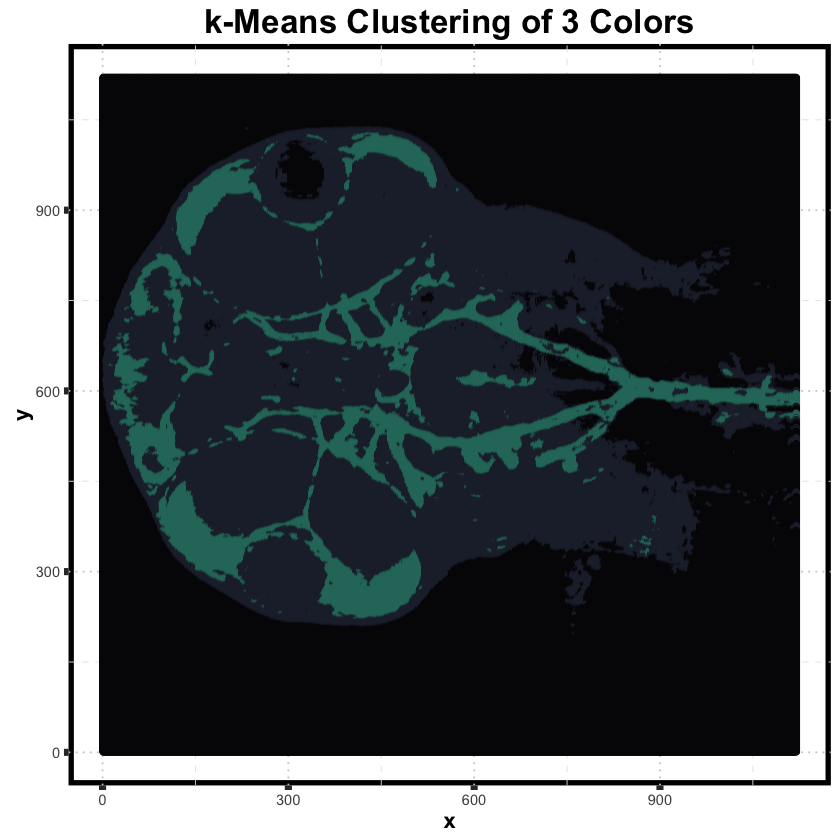

In [37]:
ggplot(data = imgRGB, aes(x = x, y = y)) + 
  geom_point(colour = kColours) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colors")) +
  xlab("x") +
  ylab("y") + 
  plotTheme()

## Resources

### Popular image processing packages
 
1. imager 
2. EBImage from bioc 
3. ripa 
4. adimpro


### Image processing in R blogs
 
https://www.linkedin.com/pulse/image-processing-r-part-1-anuj-kumar  
 
http://www.r-bloggers.com/new-package-for-image-processing-in-r/  
 
http://blog.kaggle.com/2015/12/04/image-processing-machine-learning-in-r-denoising-dirty-documents-tutorial-series/ 

### Top overall useful packages in R
 
https://support.rstudio.com/hc/en-us/articles/201057987-Quick-list-of-useful-R-packages (June 18, 2016!) by Garrett Grolemund 
 